## Mejoras

Relativas a la posible mejora de los resultados analíticos:

* uso de validación cruzada para selección de muestras
* selección de mejores hiperparámetros en los algoritmos de clasificación

Relativas a la mejora de los códigos Python:

* optimización código / refactorización
* guardar resultados modelos en estructuras (ficheros) ¿?
* control de errores en cada parte del proceso

https://randomforests.wordpress.com/2014/02/02/basics-of-k-fold-cross-validation-and-gridsearchcv-in-scikit-learn/

Data no relU  no pca (time - acc)
    * SVM -> t = 6'24'' - 89.56%
    * DCT -> t = 2'37'' - 73.06%
    * RFC -> t = 18'' - 83.19%
       
Data no relU pca
    * SVM -> t = 7'' - 89.36%
    * DCT -> t = 7'' - 73.29%
    * RFC -> t = 3'' - 76.68%

In [1]:
import os
import pickle
import numpy as np

PATH_TO_LABELS_FILE = "../data/output_dataset"
LABELS = "img_labels"

PATH_TO_DF = "../data/output_convnet"

DF_MAP = "VGG16_dfmap_no_relU_pickle" # original data no relU no pca
DF_MAP_pca = "VGG16_dfmap_no_relU_pca_pickle" # original data no relU with pca

labels = []

with open(os.path.join(PATH_TO_LABELS_FILE,LABELS),'r') as f_img_labels:
    for line in f_img_labels:
        labels.append(line[:-1])

features = pickle.load(open(os.path.join(PATH_TO_DF,DF_MAP),'rb'))
features_pca = pickle.load(open(os.path.join(PATH_TO_DF,DF_MAP_pca),'rb'))

features_arr = np.array(features)
features_arr_pca = np.array(features_pca)
labels_arr = np.array(labels)

print("Deep features - deep feature map + relU")
print()
print("Structure dims: {0:d} x {1:d}".format(features_arr.shape[0], features_arr.shape[1]))
print()
print("N of deep features arrays (images): ", features_arr.shape[0])
print()
print("N of deep features: ",features_arr.shape[1])
print()
print(features_arr) # array with deep features
print()
print()
print("Deep features - deep feature map no relU")
print()
print("Structure dims: {0:d} x {1:d}".format(features_arr_pca.shape[0], features_arr_pca.shape[1]))
print()
print("N of deep features arrays (images): ", features_arr_pca.shape[0])
print()
print("N of deep features: ",features_arr_pca.shape[1])
print()
print(features_arr_pca) # array with deep features
print()
print()
print("Image's labels")
print()
print("Structure: ", type(labels_arr))
print()
print("Nº of image labels (images): ", len(labels_arr))
print()
print(labels_arr) # img's label

Deep features - deep feature map + relU

Structure dims: 5000 x 4096

N of deep features arrays (images):  5000

N of deep features:  4096

[[  1.4363389   -9.70764256 -14.33625031 ...,  -0.2988835   -4.04614496
   -2.43703127]
 [ -6.25107241  -8.4447031  -11.96656322 ...,   0.47403866  -4.45992088
   -8.00944138]
 [  7.5820446  -21.92349815  -4.70616055 ...,   9.63796329  -3.06682301
  -17.91776276]
 ..., 
 [ -4.1283865    1.40950263  -4.15737724 ...,   0.21009497  -0.19954918
   -1.71088219]
 [ -3.73391938  -0.72124833  -5.90556002 ...,   0.99256498  -0.52596283
   -2.18934989]
 [ -2.97715545   0.57167876  -6.36512375 ...,  -1.06647027  -1.3277365
   -3.27218819]]


Deep features - deep feature map no relU

Structure dims: 5000 x 200

N of deep features arrays (images):  5000

N of deep features:  200

[[-0.01645746 -0.01567759  0.01135278 ..., -0.01829816 -0.0011744
   0.00744266]
 [-0.01205996 -0.00428557  0.00029339 ...,  0.01500359 -0.00822777
   0.0216798 ]
 [-0.01933824 -0.0009

In [2]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import time


cv_skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=42)
# cv_kf = KFold(n_splits=5, shuffle=False, random_state=42)

# svm
SVM = LinearSVC()

ti_svm = time.time()

# data -> original dfmap no pca
scores = cross_val_score(SVM, features_arr, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred = cross_val_predict(SVM,features_arr, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat = confusion_matrix(labels_arr,y_pred)

tf_svm = time.time()
tt_svm = tf_svm - ti_svm


ti_svm_pca = time.time()

# data -> original dfmap pca
scores_pca = cross_val_score(SVM, features_arr_pca, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred_pca = cross_val_predict(SVM,features_arr_pca, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat_pca = confusion_matrix(labels_arr,y_pred_pca)

tf_svm_pca = time.time()
tt_svm_pca = tf_svm_pca - ti_svm_pca

In [3]:
# calc time
print(time.strftime("%H:%M:%S", time.gmtime(tt_svm))) # no pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_svm_pca))) # pca

00:06:24
00:00:07


In [4]:
print("Feature map sin reducción de dimensiones")
print()

for i, score in enumerate(scores):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores.mean()*100))

print()
print()

Feature map sin reducción de dimensiones

acc fold nº 1: 88.89
acc fold nº 2: 88.10
acc fold nº 3: 89.68
acc fold nº 4: 89.48
acc fold nº 5: 91.07
acc fold nº 6: 92.14
acc fold nº 7: 88.71
acc fold nº 8: 90.52
acc fold nº 9: 89.11
acc fold nº 10: 87.90

media obtenida: 89.56




In [5]:
print("Feature map con reducción de dimensiones")
print()

for i, score in enumerate(scores_pca):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores_pca.mean()*100))

Feature map con reducción de dimensiones

acc fold nº 1: 89.29
acc fold nº 2: 88.29
acc fold nº 3: 90.08
acc fold nº 4: 89.88
acc fold nº 5: 91.27
acc fold nº 6: 90.93
acc fold nº 7: 90.32
acc fold nº 8: 88.91
acc fold nº 9: 88.31
acc fold nº 10: 86.29

media obtenida: 89.36


In [6]:
# confusion matrix
conf_mat

array([[585,   6,  18,   4,   6,   6,   0,   0],
       [  5, 507,  71,   3,  33,   1,   5,   0],
       [ 34,  67, 450,  42,  23,   9,   0,   0],
       [  1,   4,  57, 557,   2,   4,   0,   0],
       [  3,  41,  12,   0, 560,   3,   6,   0],
       [  8,   1,  11,   8,   3, 594,   0,   0],
       [  1,   1,   0,   0,   3,   1, 604,  15],
       [  0,   1,   0,   0,   0,   0,   3, 621]])

In [7]:
conf_mat_pca

array([[599,   6,  12,   1,   3,   4,   0,   0],
       [  2, 509,  63,   1,  46,   2,   2,   0],
       [ 35,  81, 455,  30,  19,   5,   0,   0],
       [  1,   7,  66, 548,   2,   1,   0,   0],
       [  4,  46,  12,   0, 558,   2,   2,   1],
       [ 12,   1,   8,  13,   4, 587,   0,   0],
       [  0,   0,   0,   0,   8,   0, 587,  30],
       [  0,   0,   0,   0,   0,   0,   0, 625]])

In [8]:
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',size=20)
    plt.xlabel('Predicted label',size=20)

In [9]:
PATH_TO_IMG = "../data/input_dataset"
class_names = sorted([folder for folder in os.listdir(PATH_TO_IMG)
                      if os.path.isdir(os.path.join(PATH_TO_IMG, folder))])

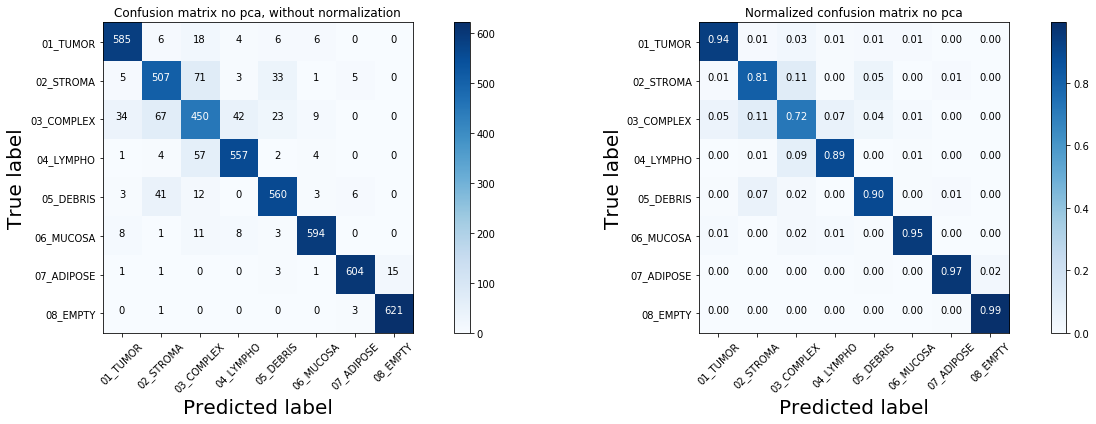

In [10]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix no pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix no pca')

plt.savefig(os.path.join(PATH_TO_DF, "svm_no_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

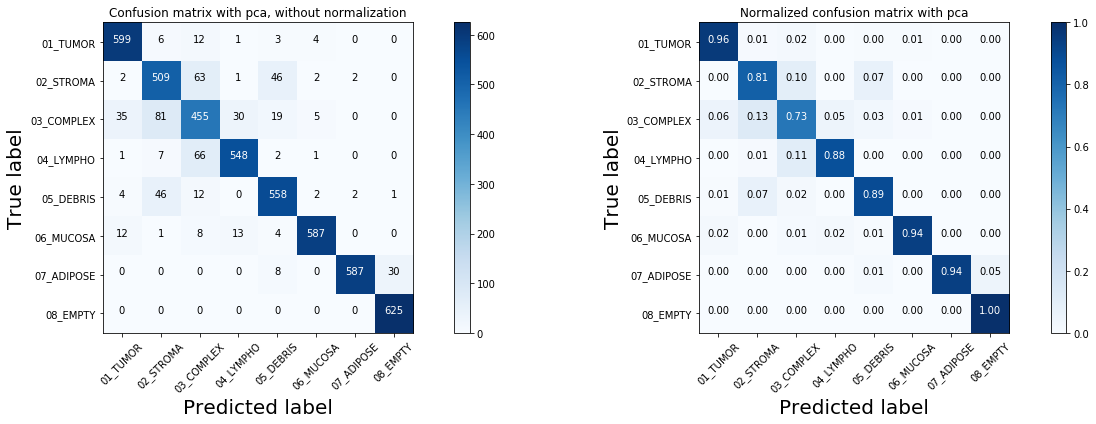

In [11]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat_pca, classes=class_names,
                      title='Confusion matrix with pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix with pca')

plt.savefig(os.path.join(PATH_TO_DF, "svm_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

# DTC
DTC = DecisionTreeClassifier()

ti_dtc = time.time()

# data -> original dfmap no pca
scores = cross_val_score(DTC, features_arr, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred = cross_val_predict(DTC,features_arr, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat = confusion_matrix(labels_arr,y_pred)

tf_dtc = time.time()
tt_dtc = tf_dtc - ti_dtc


ti_dtc_pca = time.time()

# data -> original dfmap pca
scores_pca = cross_val_score(DTC, features_arr_pca, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred_pca = cross_val_predict(DTC,features_arr_pca, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat_pca = confusion_matrix(labels_arr,y_pred_pca)

tf_dtc_pca = time.time()
tt_dtc_pca = tf_dtc_pca - ti_dtc_pca

In [13]:
# calc time
print(time.strftime("%H:%M:%S", time.gmtime(tt_dtc))) # no pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_dtc_pca))) # pca

00:02:37
00:00:07


In [14]:
print("Feature map sin reducción de dimensiones")
print()

for i, score in enumerate(scores):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores.mean()*100))

print()
print()

Feature map sin reducción de dimensiones

acc fold nº 1: 72.22
acc fold nº 2: 74.21
acc fold nº 3: 74.80
acc fold nº 4: 73.61
acc fold nº 5: 71.83
acc fold nº 6: 73.99
acc fold nº 7: 74.80
acc fold nº 8: 72.78
acc fold nº 9: 70.36
acc fold nº 10: 71.98

media obtenida: 73.06




In [15]:
print("Feature map con reducción de dimensiones")
print()

for i, score in enumerate(scores_pca):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores_pca.mean()*100))

Feature map con reducción de dimensiones

acc fold nº 1: 74.21
acc fold nº 2: 73.41
acc fold nº 3: 74.80
acc fold nº 4: 74.40
acc fold nº 5: 73.21
acc fold nº 6: 73.59
acc fold nº 7: 72.58
acc fold nº 8: 72.78
acc fold nº 9: 70.56
acc fold nº 10: 73.39

media obtenida: 73.29


In [16]:
# confusion matrix
conf_mat

array([[425,  32,  70,  15,  44,  36,   3,   0],
       [ 27, 386, 111,   5,  61,  33,   1,   1],
       [ 70,  82, 326,  74,  40,  33,   0,   0],
       [ 13,   6,  74, 500,   7,  25,   0,   0],
       [ 46,  81,  42,  14, 386,  26,  26,   4],
       [ 34,  22,  48,  25,  32, 461,   3,   0],
       [  1,   4,   3,   0,  17,   6, 567,  27],
       [  0,   3,   0,   0,   1,   0,  19, 602]])

In [17]:
conf_mat_pca

array([[421,  22,  93,  13,  53,  22,   1,   0],
       [ 12, 399, 112,  13,  70,  17,   2,   0],
       [ 69,  96, 297,  84,  51,  26,   2,   0],
       [ 18,  10,  68, 494,   8,  27,   0,   0],
       [ 54,  82,  55,  16, 385,  15,  18,   0],
       [ 26,  14,  49,  20,  35, 477,   4,   0],
       [  0,   2,   1,   1,  15,   1, 589,  16],
       [  1,   0,   0,   0,   1,   0,  20, 603]])

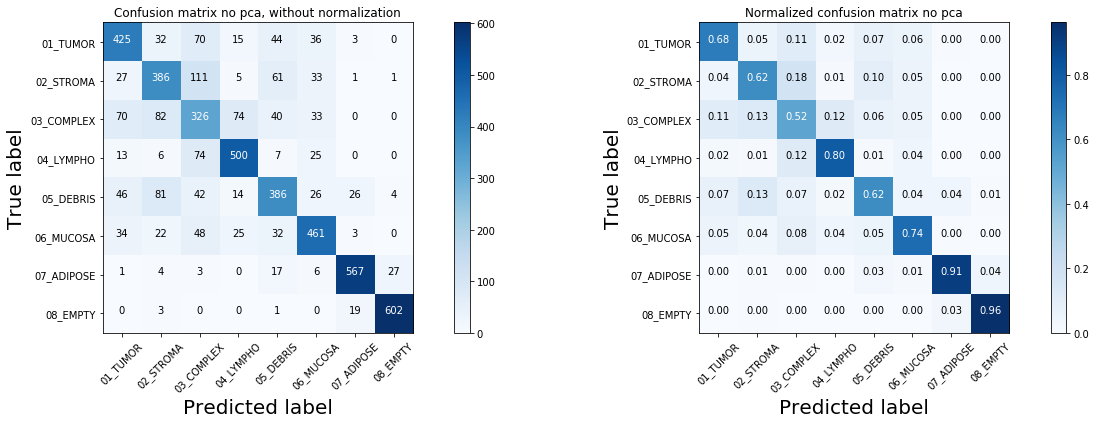

In [18]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix no pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix no pca')

plt.savefig(os.path.join(PATH_TO_DF, "dtc_no_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

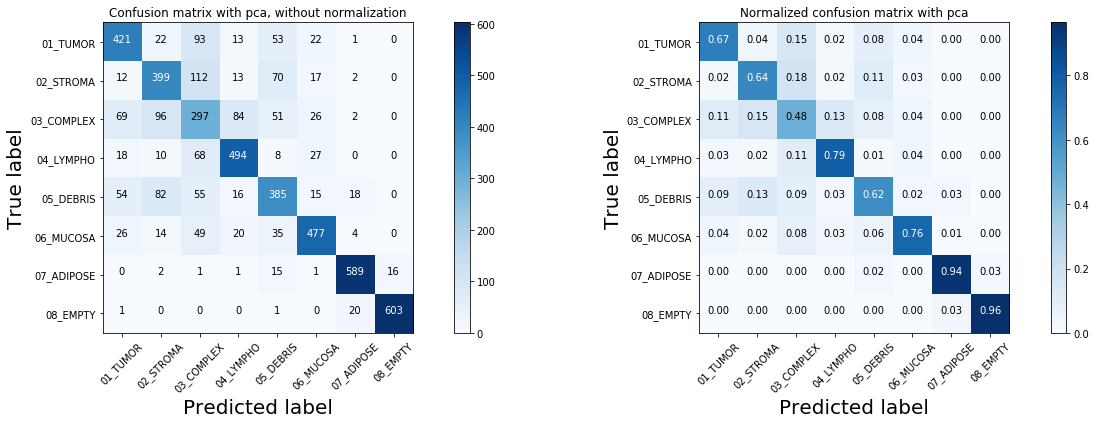

In [19]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat_pca, classes=class_names,
                      title='Confusion matrix with pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix with pca')

plt.savefig(os.path.join(PATH_TO_DF, "dtc_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

# RFC
RFC = RandomForestClassifier()

ti_rfc = time.time()

# data -> original dfmap no pca
scores = cross_val_score(RFC, features_arr, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred = cross_val_predict(RFC,features_arr, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat = confusion_matrix(labels_arr,y_pred)

tf_rfc = time.time()
tt_rfc = tf_rfc - ti_rfc


ti_rfc_pca = time.time()

# data -> original dfmap pca
scores_pca = cross_val_score(RFC, features_arr_pca, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred_pca = cross_val_predict(RFC,features_arr_pca, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat_pca = confusion_matrix(labels_arr,y_pred_pca)

tf_rfc_pca = time.time()
tt_rfc_pca = tf_rfc_pca - ti_rfc_pca

In [21]:
# calc time
print(time.strftime("%H:%M:%S", time.gmtime(tt_rfc))) # no pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_rfc_pca))) # pca

00:00:18
00:00:03


In [22]:
print("Feature map sin reducción de dimensiones")
print()

for i, score in enumerate(scores):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores.mean()*100))

print()
print()

Feature map sin reducción de dimensiones

acc fold nº 1: 83.53
acc fold nº 2: 84.72
acc fold nº 3: 85.12
acc fold nº 4: 82.34
acc fold nº 5: 84.13
acc fold nº 6: 84.27
acc fold nº 7: 81.85
acc fold nº 8: 85.28
acc fold nº 9: 81.05
acc fold nº 10: 79.64

media obtenida: 83.19




In [23]:
print("Feature map con reducción de dimensiones")
print()

for i, score in enumerate(scores_pca):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores_pca.mean()*100))

Feature map con reducción de dimensiones

acc fold nº 1: 75.00
acc fold nº 2: 76.98
acc fold nº 3: 75.99
acc fold nº 4: 76.59
acc fold nº 5: 77.98
acc fold nº 6: 79.23
acc fold nº 7: 78.63
acc fold nº 8: 79.44
acc fold nº 9: 73.39
acc fold nº 10: 73.59

media obtenida: 76.68


In [24]:
# confusion matrix
conf_mat

array([[535,  10,  47,   7,   9,  17,   0,   0],
       [ 16, 484,  72,   2,  47,   4,   0,   0],
       [ 65,  97, 385,  46,  19,  13,   0,   0],
       [ 10,   5,  71, 526,   4,   9,   0,   0],
       [ 43,  59,  21,   6, 478,   9,   9,   0],
       [ 27,   5,  21,  23,  17, 531,   1,   0],
       [  0,   0,   0,   0,   7,   1, 606,  11],
       [  0,   1,   0,   0,   1,   0,   8, 615]])

In [25]:
conf_mat_pca

array([[504,  15,  59,   8,  14,  24,   1,   0],
       [ 39, 435,  83,   7,  50,  10,   1,   0],
       [ 94, 136, 303,  55,  21,  16,   0,   0],
       [ 16,  23,  65, 507,   4,  10,   0,   0],
       [ 57,  91,  40,  10, 411,  10,   6,   0],
       [ 49,  19,  34,  32,  25, 466,   0,   0],
       [  1,   4,   1,   0,   9,   0, 598,  12],
       [  0,   0,   0,   0,   1,   0,  14, 610]])

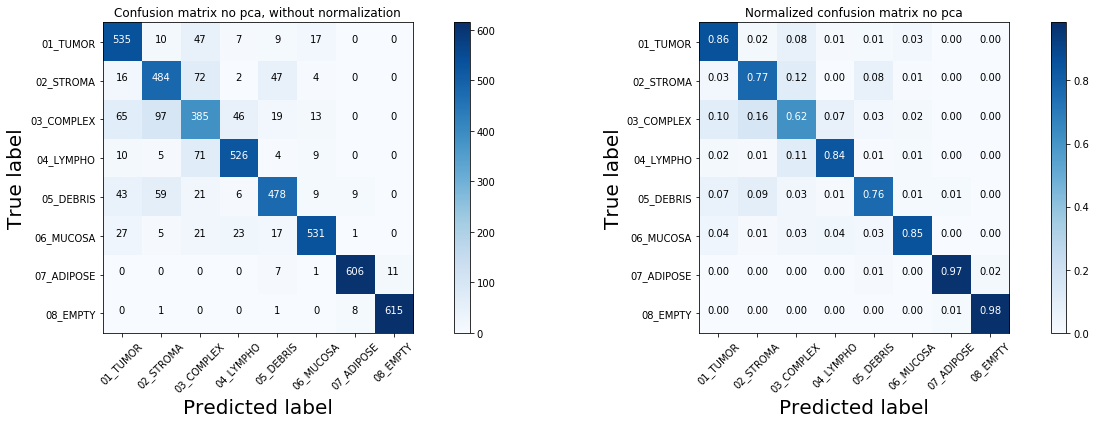

In [26]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix no pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix no pca')

plt.savefig(os.path.join(PATH_TO_DF, "rfc_no_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

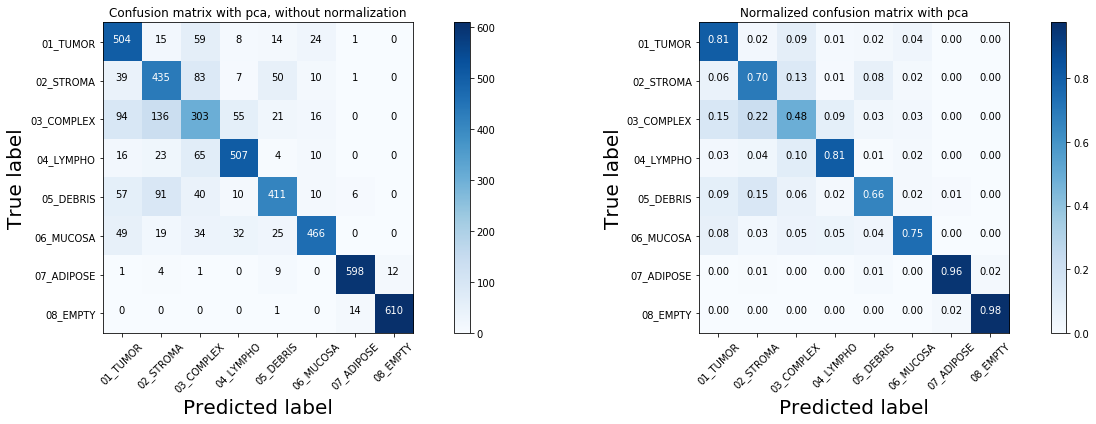

In [27]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat_pca, classes=class_names,
                      title='Confusion matrix with pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix with pca')

plt.savefig(os.path.join(PATH_TO_DF, "rfc_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()